In [1]:
from rxitect.structs.environment import Environment, Objective
from rxitect.structs.vocabulary import SelfiesVocabulary
from rxitect.models.vanilla.predictor import Predictor
from rxitect import tensor_utils
from rxitect.models.lightning.generator import Generator
from rdkit import Chem
from rxitect import mol_utils

import torch
import selfies as sf

In [2]:
A1_pred = Predictor(path="../models/RF_REG_CHEMBL226.pkg")
A2A_pred = Predictor(path="../models/RF_REG_CHEMBL251.pkg")
ERG_pred = Predictor(path="../models/RF_REG_CHEMBL240.pkg")

In [3]:
A1_pred.__dict__

{'type': 'REG',
 'model': RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)}

In [4]:
mod1 = tensor_utils.ClippedScore(lower_x=4, upper_x=6.5)
mod2 = tensor_utils.ClippedScore(lower_x=9, upper_x=6.5)
mod3 = tensor_utils.ClippedScore(lower_x=7.5, upper_x=5)
no_mod = lambda x: x

In [5]:
A1 = Objective(predictor=A1_pred,
               modifier=mod1,
               threshold=0.99,
               key="A1")
A2A = Objective(predictor=A2A_pred,
                modifier=mod1,
                threshold=0.99,
                key="A2A")
ERG = Objective(predictor=ERG_pred,
                modifier=mod2,
                threshold=0.99,
                key="ERG")

In [6]:
A1.__dict__

{'predictor': <rxitect.models.vanilla.predictor.Predictor at 0x26edda02388>,
 'modifier': <rxitect.tensor_utils.ClippedScore at 0x26f9dd07388>,
 'threshold': 0.99,
 'key': 'A1'}

In [7]:
env = Environment([A1, A2A, ERG])

In [8]:
env.__dict__

{'objectives': [Objective(predictor=<rxitect.models.vanilla.predictor.Predictor object at 0x0000026EDDA02388>, modifier=<rxitect.tensor_utils.ClippedScore object at 0x0000026F9DD07388>, threshold=0.99, key='A1'),
  Objective(predictor=<rxitect.models.vanilla.predictor.Predictor object at 0x0000026F17EAAE08>, modifier=<rxitect.tensor_utils.ClippedScore object at 0x0000026F9DD07388>, threshold=0.99, key='A2A'),
  Objective(predictor=<rxitect.models.vanilla.predictor.Predictor object at 0x0000026EDDA55988>, modifier=<rxitect.tensor_utils.ClippedScore object at 0x0000026F9DD076C8>, threshold=0.99, key='ERG')],
 'ths': [0.99, 0.99, 0.99],
 'keys': ['A1', 'A2A', 'ERG']}

In [9]:
env.get_preds(mols=["CCC", "CC"], is_smiles=True)

,A1,A2A,ERG,DESIRE
0,0.005936,0.000940,1.0,0
1,0.005204,0.001832,1.0,0


In [10]:
env.calc_reward(smiles=["CCC", "CC"], scheme="PR")

array([[0.  ],
       [0.25]])

In [11]:
voc = SelfiesVocabulary("../data/processed/selfies_voc.txt")
gen = Generator(vocabulary=voc)
gen.load_state_dict(torch.load("../models/pretrained_selfies_rnn.ckpt")["state_dict"])

<All keys matched successfully>

In [12]:
sampled = gen.sample(50)
dec_sampled = [voc.decode(x) for x in sampled]
smiles = [sf.decoder(x) for x in dec_sampled]

In [13]:
preds = env.get_preds(mols=smiles, is_smiles=True)

In [14]:
desired_idx = preds.query("DESIRE == 1").index

In [15]:
preds["SMILES"] = smiles

In [16]:
desirables = preds.iloc[desired_idx]

In [17]:
smiles_to_plot = desirables["SMILES"].tolist()

In [18]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in smiles_to_plot])

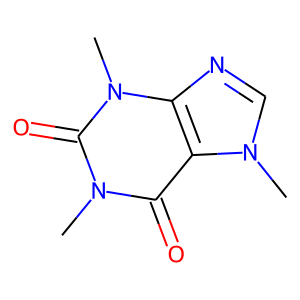

In [19]:
caffeine_smi = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"
Chem.Draw.MolToImage(Chem.MolFromSmiles(caffeine_smi))

In [20]:
z = mol_utils.get_fingerprint(Chem.MolFromSmiles(caffeine_smi), fp_type='ECFP6')

In [21]:
smiles_to_plot

[]

In [22]:
preds

,A1,A2A,ERG,DESIRE,SMILES
0,0.735871,0.528264,1.0,0,O=C(NCC1=CC=CO1)C2=NN(CCCCCCCC(=O)NO)C3=CC=CC=C23
1,0.741511,0.366176,1.0,0,O=C(C1=CSN=N1)N2CCCC3(CCN(C(=O)C4=CC=CN=C4)CC3)C2
2,0.048047,0.097851,1.0,0,CCN(CC)C(C)CC1=CC=CC=C1OC2=CC=C(F)C=C2F
3,0.461673,0.519590,1.0,0,CN(C)C(COCCN1C=NC2=C(NN=CC=CC=CCl)N=C(N)N=C21)C=O
4,0.302886,0.269661,1.0,0,CCC1=NN=C2N1CCN(C(=O)CC3=CC=CC=C3)C2
5,0.000000,0.003993,1.0,0,CC=1[NH1]N=C(C(=O)O)C=1
6,0.090275,0.065830,1.0,0,CNC(=O)C1C2C(C3)C4CC5C(O)CC6(O)CC(O)CC(O)C6C5C...
7,0.023761,0.156413,1.0,0,CC=CC1C(=O)NC(O)=C2C=C([N+1](=O)[O-1])C(=O)[NH...
8,0.716748,0.769075,1.0,0,O=C(C=CC1=CC=C(C2=NC3=CC=CC=C3S2)C(=O)[NH1]1)N...
9,0.410964,0.610990,1.0,0,CC=NC=C(C(=O)NC1=CC=NC=C1Cl)C=C(NC(=O)C2=CC=CC...


In [23]:
env.calc_reward(smiles=smiles, scheme="PR")

array([[0.38],
       [0.34],
       [0.07],
       [0.37],
       [0.26],
       [0.  ],
       [0.08],
       [0.02],
       [0.48],
       [0.36],
       [0.22],
       [0.14],
       [0.11],
       [0.35],
       [0.01],
       [0.49],
       [0.45],
       [0.29],
       [0.05],
       [0.39],
       [0.3 ],
       [0.46],
       [0.27],
       [0.06],
       [0.15],
       [0.21],
       [0.2 ],
       [0.44],
       [0.04],
       [0.09],
       [0.24],
       [0.42],
       [0.33],
       [0.43],
       [0.23],
       [0.16],
       [0.4 ],
       [0.25],
       [0.18],
       [0.13],
       [0.47],
       [0.31],
       [0.28],
       [0.41],
       [0.03],
       [0.32],
       [0.12],
       [0.1 ],
       [0.19],
       [0.17]])